In [49]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

In [50]:
data = pd.read_csv("train.csv")

In [51]:
#Visualising the data
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
#Converting the data into a numpy array
data = np.array(data)
#m=rows and n=features+1
m, n = data.shape
np.random.shuffle(data)
#Creating a Cross Validation dataset and transposing it
data_dev = data[1:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255. 
#Creating a Training dataset and transposing it
data_train = data[1000:m].T 
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [74]:
#Initializing the parameters (Weight and Bias) for the neural network
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1, b1, W2, b2

#Defining required mathematical functions

#Defining the ReLu Function
def ReLu(Z):
    return np.maximum(Z,0)

#Defining the softmax function
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

#Forward Propagation function
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

#One-Hot Encoding Y
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1)) #m,n
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T #Transposing
    return one_hot_Y

#Derivative of ReLu
def deriv_ReLu(Z):
    return Z > 0 #Returns 1 or 0 (Boolean)

#Backwards Propagation function
def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLu(Z1)
    dW1 = 1 / m * dZ2.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

#Updates the parameters for back prop
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [75]:
#Predictions
def get_predictions(A2):
    return np.argmax(A2,0)

#Accuracy
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

# Gradient Descent on neural network function 
def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            print ("Accuracy: ", (get_accuracy(get_predictions(A2), Y)) * 100)
    return W1, b1, W2, b2

In [76]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
[5 5 2 ... 2 2 5] [8 8 3 ... 7 7 0]
Accuracy:  7.648780487804878
Iteration:  50
[8 8 8 ... 7 7 2] [8 8 3 ... 7 7 0]
Accuracy:  59.57073170731707
Iteration:  100
[8 8 3 ... 7 7 2] [8 8 3 ... 7 7 0]
Accuracy:  72.23170731707317
Iteration:  150
[8 8 3 ... 7 7 2] [8 8 3 ... 7 7 0]
Accuracy:  76.4390243902439
Iteration:  200
[8 8 3 ... 7 7 2] [8 8 3 ... 7 7 0]
Accuracy:  79.02439024390245
Iteration:  250
[8 8 3 ... 7 7 2] [8 8 3 ... 7 7 0]
Accuracy:  81.49756097560974
Iteration:  300
[8 8 3 ... 7 7 2] [8 8 3 ... 7 7 0]
Accuracy:  83.01951219512195
Iteration:  350
[8 8 3 ... 7 7 2] [8 8 3 ... 7 7 0]
Accuracy:  84.00487804878048
Iteration:  400
[8 8 3 ... 7 7 2] [8 8 3 ... 7 7 0]
Accuracy:  84.74634146341464
Iteration:  450
[8 8 3 ... 7 7 2] [8 8 3 ... 7 7 0]
Accuracy:  85.35853658536585


# 85.35% Accuracy on training set

In [77]:
#Predictions from the neural network
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  8


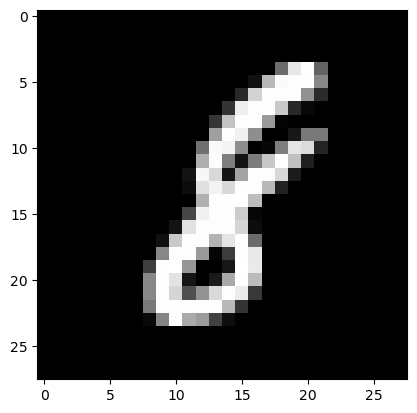

Prediction:  [8]
Label:  8


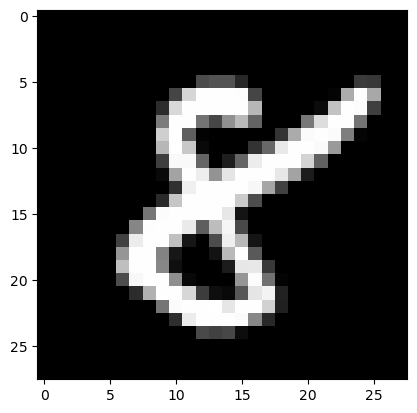

Prediction:  [3]
Label:  3


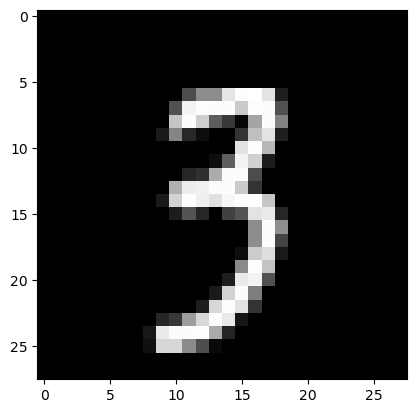

Prediction:  [3]
Label:  3


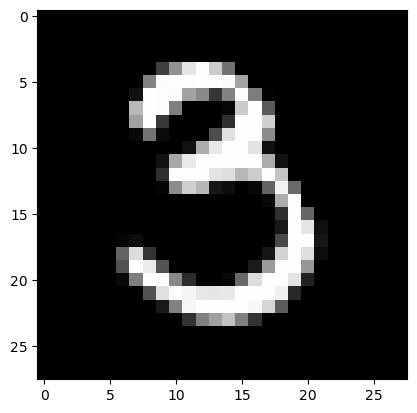

In [78]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [79]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[9 3 6 4 5 3 9 7 0 5 5 2 0 7 9 6 6 9 1 5 7 7 5 0 4 4 1 1 8 1 5 3 2 1 9 3 8
 5 1 9 8 2 0 5 3 2 2 0 4 2 7 0 2 5 0 1 7 7 5 3 5 3 4 1 3 4 2 8 3 3 3 9 7 2
 6 4 9 3 1 3 3 3 1 0 4 9 8 9 5 4 6 7 8 1 2 2 7 2 1 9 6 5 2 6 7 4 3 9 1 6 0
 0 3 0 1 3 0 0 8 8 4 4 0 7 1 7 6 7 4 5 3 5 0 1 9 9 8 8 3 5 8 6 9 2 2 0 1 3
 0 6 9 5 4 5 1 4 4 8 0 3 4 1 1 0 4 4 1 5 4 5 4 2 3 6 1 9 4 0 9 0 5 7 0 9 0
 9 0 4 7 3 8 8 5 1 9 2 9 2 2 6 6 8 9 3 2 4 6 1 6 1 1 1 3 4 9 6 3 6 9 1 7 0
 5 7 4 9 0 6 1 1 6 9 4 6 1 3 5 4 5 0 9 0 1 8 4 1 7 9 6 4 4 5 9 4 9 6 1 1 6
 9 4 9 3 2 8 3 7 1 6 3 6 2 7 7 4 0 3 6 1 8 4 1 7 3 7 7 2 9 4 3 1 5 0 7 1 3
 6 1 0 9 9 3 1 4 3 1 8 7 0 2 4 6 3 2 6 3 7 9 6 7 5 2 7 3 6 0 4 0 7 5 7 9 0
 1 9 2 6 1 7 4 3 4 4 7 5 4 6 9 7 1 3 5 5 9 3 9 0 7 3 1 6 5 5 9 2 5 2 0 4 0
 3 1 8 7 7 7 2 2 6 1 7 0 4 7 4 2 4 6 6 5 9 4 8 6 0 7 9 1 6 1 9 3 4 7 4 5 8
 0 0 5 6 5 6 0 3 8 3 4 5 9 9 7 9 8 8 2 2 1 7 8 3 3 7 0 8 7 1 0 1 8 3 9 8 0
 0 1 3 1 0 7 3 8 4 0 5 4 9 3 5 6 5 2 6 3 5 0 6 5 1 8 7 5 3 0 6 6 9 0 3 6 0
 6 3 7 2 3 6 5 8 3 7 5 0 

0.8468468468468469

# 84.68% Accuracy on Cross Validation set